<a href="https://colab.research.google.com/github/Shadowfire7/Blower_pipe/blob/main/Confusion_Matrix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication (2).csv


In [18]:
df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [19]:
factors = df[["variance", "skewness", "curtosis", "entropy"]]
forged = df[["class"]]

factors_train, factors_test, forged_train, forged_test = train_test_split(factors, forged, test_size = 0.25, random_state = 0)

In [20]:
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)  
factors_test = sc_x.transform(factors_test)

In [21]:
from sklearn.linear_model import LogisticRegression

classifier2 = LogisticRegression(random_state=0)
classifier2.fit(factors_train, forged_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [22]:
forged_prediction = classifier2.predict(factors_test)

predicted_values_1 = []
for i in forged_prediction:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")

actual_values_1 = []
for i in forged_prediction.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authentic')]

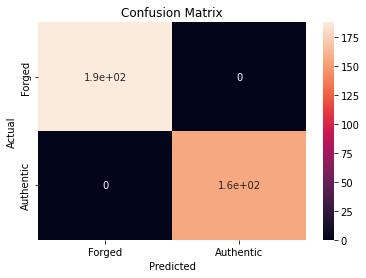

In [31]:
labels= ("Forged", "Authentic")

cm = confusion_matrix(actual_values_1, predicted_values_1)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)